In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv(r"D:\aiml\jupyter\nlp_projects\Sentiment-Analysis\sentiment-analysis-dataset\train.tsv\train.tsv", sep='\t')

In [55]:
data.sample(10)

,PhraseId,SentenceId,Phrase,Sentiment
8932,8933,372,give willi,1
2782,2783,107,thought film art ethic cost moral compromis,4
6820,6821,274,chri ver weil,2
5624,5625,223,dumb,1
7394,7395,301,shallow,1
8518,8519,352,crassli reduct,1
6581,6582,261,armenian,2
3565,3566,133,funnier,2
1273,1274,47,airless cinemat shell game,2
8800,8801,367,though goe anyon seen hunger cat peopl find li...,1


In [20]:
data.shape

(156060, 4)

In [21]:
data = data.iloc[:10000,:]

In [22]:
data.shape

(10000, 4)

In [24]:
data['Sentiment'].value_counts()

Sentiment
2    5638
3    1860
1    1633
4     488
0     381
Name: count, dtype: int64

<Axes: xlabel='Sentiment'>

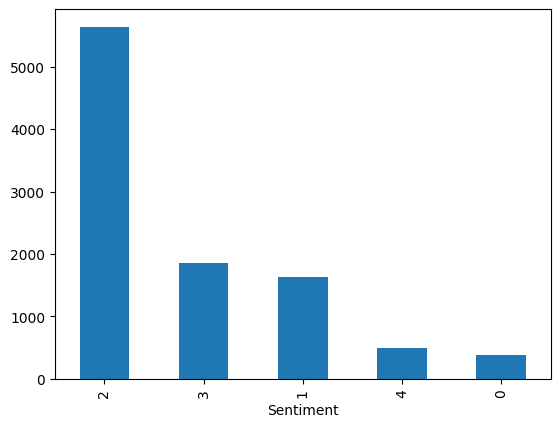

In [25]:
data['Sentiment'].value_counts().plot(kind='bar')

In [30]:
print(data['Sentiment'].value_counts())


Sentiment
2    5638
3    1860
1    1633
4     488
0     381
Name: count, dtype: int64


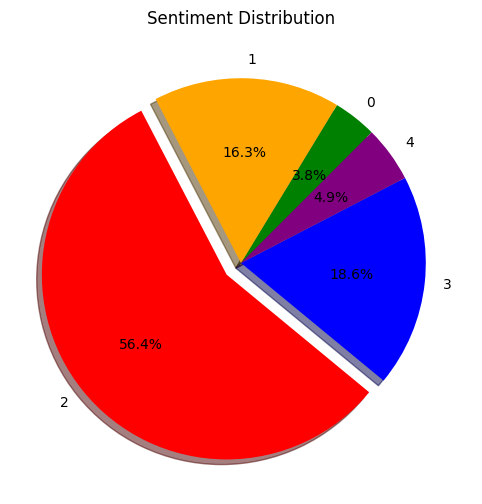

In [32]:

plt.figure(figsize=(10, 6))

# 5 colors for 5 classes
colors = ['green', 'orange', 'red', 'blue', 'purple']

# explode one slice (e.g. class 2, the dominant one)
explode = (0, 0, 0.1, 0, 0)

# Sort index so labels go from 0 to 4
data['Sentiment'].value_counts().sort_index().plot(
    kind='pie',
    autopct='%.1f%%',
    shadow=True,
    colors=colors,
    startangle=45,
    explode=explode
)

plt.title('Sentiment Distribution')
plt.ylabel('')  # cleaner pie chart
plt.show()


In [33]:
data['Phrase'][999]

'try to avoid'

In [35]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [37]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text)
    
    # Extract emojis
    emojis = emoji_pattern.findall(text)
    
    # Remove non-word characters and lowercase
    text = re.sub(r'\W+', ' ', text.lower()) + ' ' + ' '.join(emojis).replace('-', '')
    
    # Stemming and stopword removal
    prter = PorterStemmer()
    words = [prter.stem(word) for word in text.split() if word not in stopwords_set]
    
    return " ".join(words)


In [38]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

In [40]:
data['Phrase'] = data['Phrase'].apply(lambda x: preprocessing(x))

In [41]:
data['Phrase']

0       seri escapad demonstr adag good goos also good...
1                    seri escapad demonstr adag good goos
2                                                    seri
3                                                        
4                                                    seri
                              ...                        
9995            play like corni televis product bygon era
9996                              play like corni televis
9997                                   like corni televis
9998                                        corni televis
9999                                        corni televis
Name: Phrase, Length: 10000, dtype: object

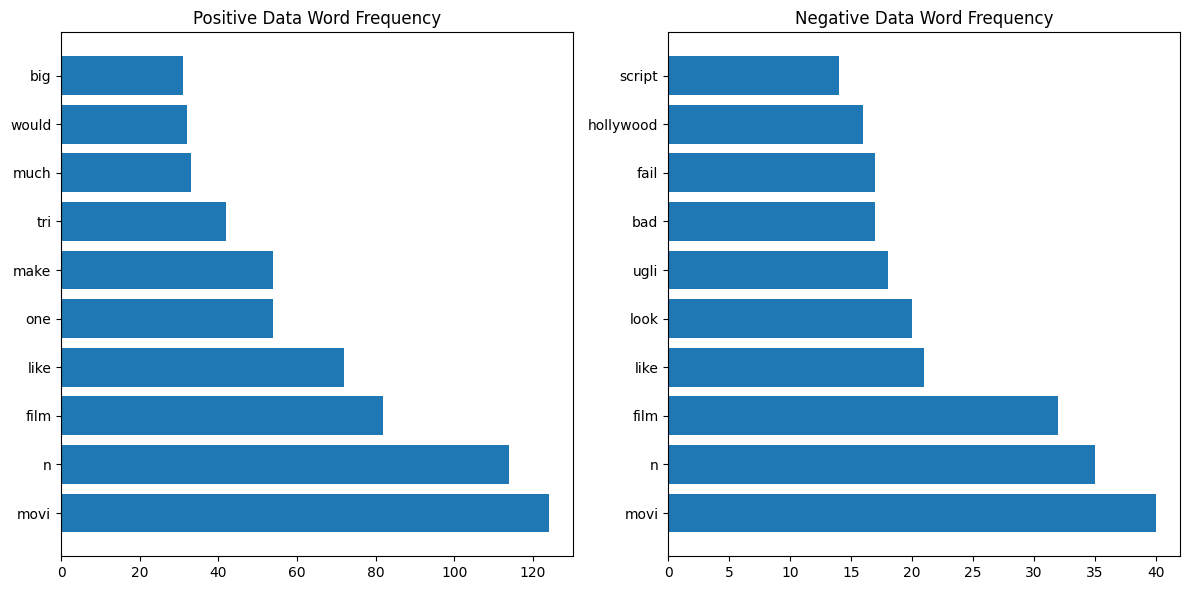

In [42]:
positivedata = data[data['Sentiment'] == 1]
positivedata = positivedata['Phrase']
negdata = data[data['Sentiment'] == 0]
negdata = negdata['Phrase']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.Sentiment.values
x=tfidf.fit_transform(data.Phrase)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [47]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    3.1s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.2s finished


In [48]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5438


In [49]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [ ]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction



prediction = prediction('one cerebr insight movi ever seen script languag costum sceneri plot charact etc suprem bore watch intens even listen movi work mani time lost count scarlett age grace acquir wisdom beyond year end movi take tara ireland famili origin see result anoth civil war play time irish english movi depict doubl standard men time man still respect girlfriend whore woman mere seen privat place man societi accus improprieti cours scarlett alway think outsid box break rule necessari creat need chang help peopl surviv scarlett beauti definit bone strength self esteem wisdom grow age rememb line confront much plate tomorrow anoth day way carri determin courag learn experi good movi show daughter teach woman import respect men especi handsom one two side may treat woman differ depend act respect attract woman need learn movi teach movi like therapi better gone wind second part take place ireland anyon irish decent cherish sceneri peopl scarlett charact within')

In [51]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")
    

negative comment


In [53]:
data['Phrase'][9995]

'play like corni televis product bygon era'

In [54]:
data['Phrase'][0]

'seri escapad demonstr adag good goos also good gander occasion amus none amount much stori'